<a href="https://colab.research.google.com/github/AlinaMidhath/ML-projects/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Car Price Prediction using Linear and Lasso Regression***

**Linear Regression**



 It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

**Lasso Regression**


Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters)

Importing libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


DATA COLLECTION AND PROCESSING

In [29]:
cp = pd.read_csv('/content/car_data[1].csv')
cp

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [30]:
cp.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
cp.shape

(301, 9)

In [32]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [33]:
cp.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [34]:
cp.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
cp.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

**Data visualization**

<BarContainer object of 301 artists>

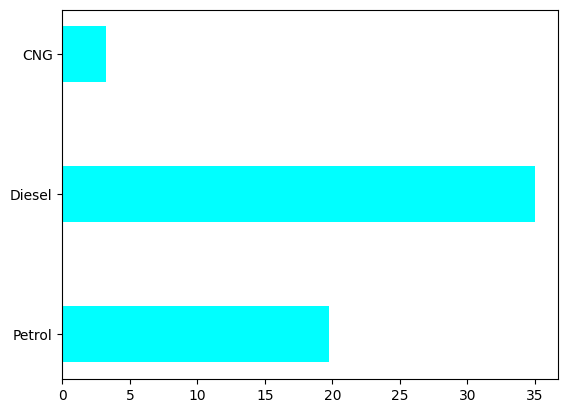

In [36]:
plt.barh(cp['Fuel_Type'] ,cp['Selling_Price'], height = 0.4, color='cyan')

<BarContainer object of 301 artists>

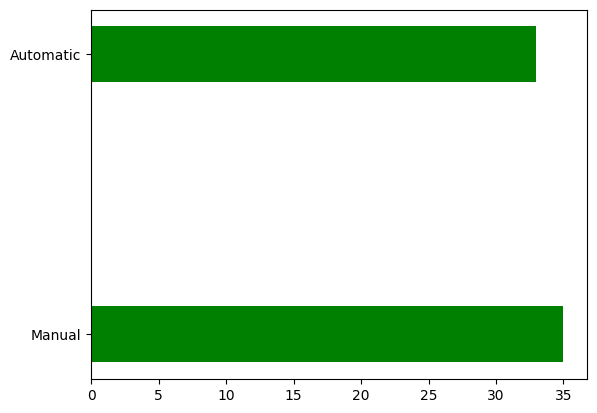

In [37]:
plt.barh(cp['Transmission'] ,cp['Selling_Price'], height = 0.2, color='green')

<BarContainer object of 301 artists>

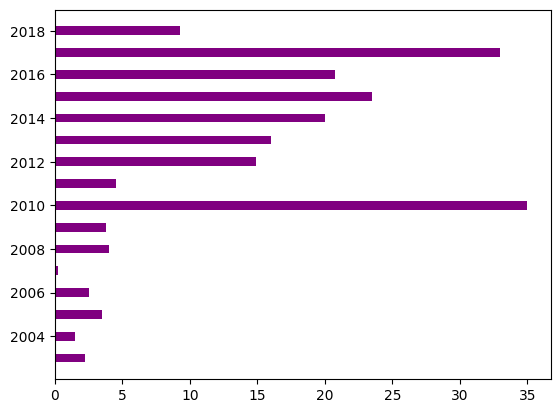

In [38]:
plt.barh(cp['Year'] ,cp['Selling_Price'], height = 0.4 , color = 'purple')

In [39]:
#checking the distribution of categorical data
print(cp.Fuel_Type.value_counts())
print(cp.Seller_Type.value_counts())
print(cp.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [40]:
#encoding the categorical data
cp.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel':1 , 'CNG':2}} , inplace = True)
cp.replace({'Seller_Type': {'Dealer':0 , 'Individual':1}}, inplace = True)
cp.replace({'Transmission': {'Manual':0 , 'Automatic':1}}, inplace = True)

In [41]:
cp.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [42]:
#splitting data into data and target
#here our target value is selling price we need to predict the selling prince
X = cp.drop(['Car_Name' , 'Selling_Price'] , axis = 1)
y = cp['Selling_Price']
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [43]:
#splittting traing nd test data
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.1, random_state=2)

MODEL TRAINING

linear regression

In [44]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [45]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

MODEL EVALUATION

In [46]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [47]:
#R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8799451660493711


DATA VISUALIZATION

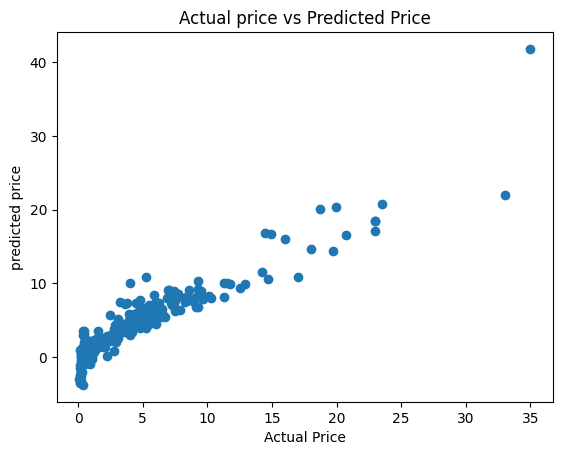

In [48]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()

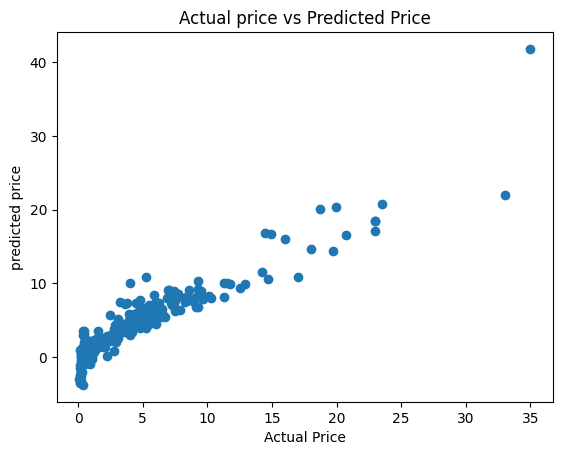

In [49]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()

In [50]:
#prediction on testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [51]:
# r squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8365766715027051


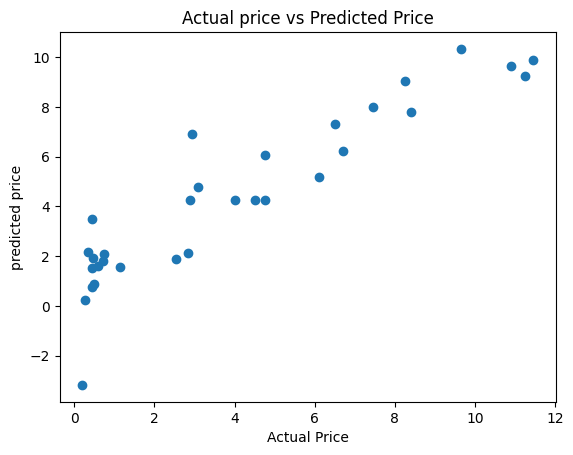

In [52]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()

now to minimize error we use LASSO

2. LASSO regression

In [53]:
#loading the linear regression model
lass_reg_model = Lasso()

In [54]:
lass_reg_model.fit(X_train, y_train)

Lasso()

MODEL EVALUATION

In [55]:
# predicion on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [56]:
# r squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


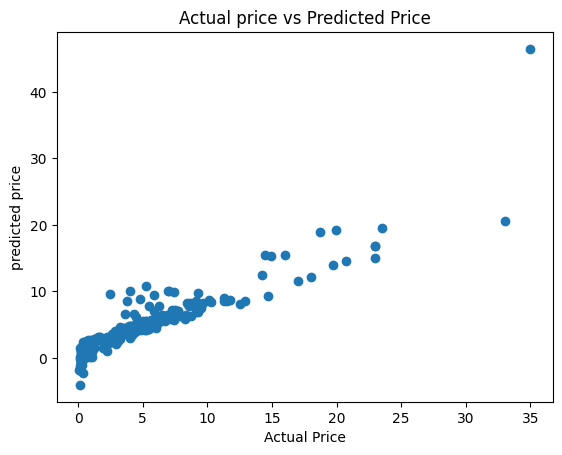

In [57]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()

In [58]:
#prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [59]:
#r squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173195


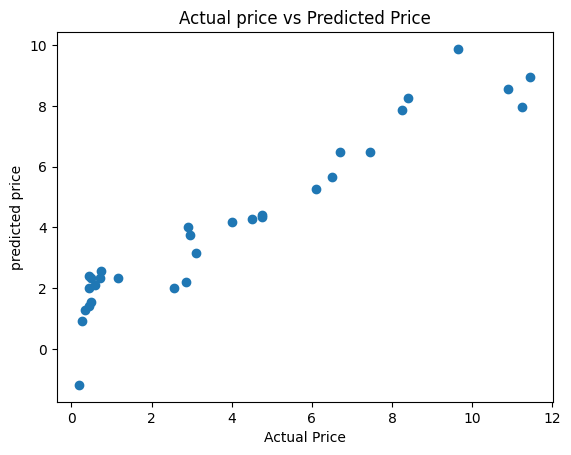

In [60]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()